<a href="https://colab.research.google.com/github/Smartsie/Invest/blob/master/Invest_with_Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## External lib imports

In [ ]:
!pip install investpy 
#==0.9.14

     |████████████████████████████████| 4.4MB 6.5MB/s 
     |████████████████████████████████| 245kB 35.0MB/s 
     |████████████████████████████████| 5.5MB 37.6MB/s 
     |████████████████████████████████| 512kB 40.9MB/s 
  Created wheel for investpy: filename=investpy-1.0.2-cp36-none-any.whl size=4466765 sha256=88efc04d0a8917a64933b5e74786f819d783120e9efe9ae032cc2addc693d080
  Stored in directory: /root/.cache/pip/wheels/a3/36/72/713ce416550c4edcd337b819c6dc3aeabe60bfcf6b463065c8
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


# Libraries Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import investpy

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
parameters = {'max_depth':[3,4,5], 'n_estimators':[500]}

In [ ]:
import plotly.express as px

# Data Import

In [ ]:
Index='EUR/USD'
data = investpy.get_currency_cross_historical_data(currency_cross=Index,from_date='01/01/2000', to_date='07/02/2021')
data=data.drop(['Currency'],axis=1)
data.tail()

,Open,High,Low,Close
Date,,,,
2021-02-01,1.2140,1.2146,1.2054,1.2059
2021-02-02,1.2059,1.2089,1.2011,1.2042
2021-02-03,1.2044,1.2050,1.2003,1.2034
2021-02-04,1.2033,1.2043,1.1957,1.1962
2021-02-05,1.1964,1.2050,1.1952,1.2042


In [ ]:
data

,Open,High,Low,Close
Date,,,,
2000-01-03,1.0052,1.0282,1.0050,1.0265
2000-01-04,1.0244,1.0347,1.0213,1.0312
2000-01-05,1.0295,1.0404,1.0282,1.0316
2000-01-06,1.0325,1.0419,1.0275,1.0324
2000-01-07,1.0327,1.0333,1.0252,1.0292
...,...,...,...,...
2021-02-01,1.2140,1.2146,1.2054,1.2059
2021-02-02,1.2059,1.2089,1.2011,1.2042
2021-02-03,1.2044,1.2050,1.2003,1.2034


In [ ]:
today='07/02/2021'
Index='USD/JPY'
eurusd = investpy.get_currency_cross_historical_data(currency_cross='EUR/USD',from_date='01/01/2000', to_date=today)
usdjpy = investpy.get_currency_cross_historical_data(currency_cross='USD/JPY',from_date='01/01/2000', to_date=today)
eurjpy = investpy.get_currency_cross_historical_data(currency_cross='EUR/JPY',from_date='01/01/2000', to_date=today)

data=eurusd
#data['EURUSD']=eurusd.Close
data['USDJPY']=usdjpy.Close
data['EURJPY']=eurjpy.Close
data=data.drop(['Currency'],axis=1)
data.tail()

,Open,High,Low,Close,USDJPY,EURJPY
Date,,,,,,
2021-02-01,1.2140,1.2146,1.2054,1.2059,104.91,126.51
2021-02-02,1.2059,1.2089,1.2011,1.2042,104.97,126.39
2021-02-03,1.2044,1.2050,1.2003,1.2034,105.01,126.36
2021-02-04,1.2033,1.2043,1.1957,1.1962,105.54,126.25
2021-02-05,1.1964,1.2050,1.1952,1.2042,105.36,126.87


Feature Engineering


1.   Add Daily percent variation (Close.today/Close.yesterday)
2.   -



In [ ]:
# Calculate daily percentage variation
data['daily perc']=data.Close/data.Close.shift(1)
data=data.dropna(axis=0)

In [ ]:
# Calculate candle ratio
# (Close-open)/(Max-Min)
# Candle =0 no big variation
# candle =+1: big variation up.Open=low and High=Close
# candle = -1: big variation down. Open=High.Close=Low
data['candle']=(data.Close-data.Open)/(data.High-data.Low)

In [ ]:
data.head()

,Open,High,Low,Close,USDJPY,EURJPY,daily perc,candle
Date,,,,,,,,
2000-01-04,1.0244,1.0347,1.0213,1.0312,103.27,106.48,1.004579,0.507463
2000-01-05,1.0295,1.0404,1.0282,1.0316,104.29,107.59,1.000388,0.172131
2000-01-06,1.0325,1.0419,1.0275,1.0324,105.33,108.66,1.000775,-0.006944
2000-01-07,1.0327,1.0333,1.0252,1.0292,105.36,108.44,0.996900,-0.432099
2000-01-10,1.0288,1.0303,1.0213,1.0257,105.11,107.78,0.996599,-0.344444


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5438a63278>,
      dtype=object)

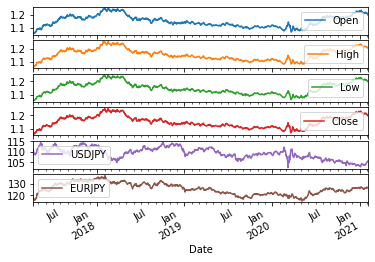

In [ ]:
data[-1000:].plot(subplots=True)

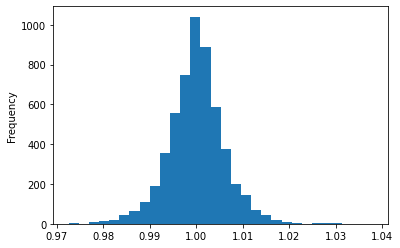

In [ ]:
# plot distribution
data['daily perc'].plot(kind='hist',bins=30)

In [ ]:
data.shape

(5498, 9)

In [ ]:
data.describe()

,Open,High,Low,Close,USDJPY,EURJPY,daily perc,candle
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,1.206512,1.212023,1.201021,1.206602,106.592636,127.402347,1.000046,0.010366
std,0.163013,0.163605,0.162346,0.162983,12.871018,16.100108,0.006028,0.510308
min,0.826800,0.832600,0.822700,0.827300,75.820000,89.530000,0.972573,-0.989305
25%,1.109800,1.114400,1.106375,1.110375,101.407500,116.370000,0.996605,-0.435380
50%,1.214200,1.219000,1.208700,1.214250,108.700000,127.970000,1.000075,0.020060
75%,1.325825,1.332300,1.319200,1.325800,116.350000,136.032500,1.003361,0.452444
max,1.600000,1.603900,1.586500,1.598800,134.770000,169.510000,1.038039,1.000000


# XGBoost Model


In [ ]:
# Generate Dataset
lookback=20
horizon=4
X=[]
y=[]
for i in range(lookback,len(data)-horizon):
  data1=data['Open'].iloc[i-lookback:i].values
  data2=data['Close'].iloc[i-lookback:i].values
  data3=data['High'].iloc[i-lookback:i].values
  data4=data['Low'].iloc[i-lookback:i].values
  #perc=data['daily perc'].iloc[i-lookback:i].values
  target=data['Low'].iloc[i+horizon]
  X.append(np.array([data1,data2,data3,data4]).ravel())
  
  y.append(target)
y=np.array(y).reshape(-1,1)

In [ ]:
# Data Scaling
scaler=MinMaxScaler()
scaler.fit(np.array(y))
X_=scaler.transform(X)
y_=scaler.transform(y)
X_train,X_test,y_train,y_test=train_test_split(X_,y_,shuffle=True,test_size=0.2)

In [ ]:
model=xgb.XGBRegressor(objective='reg:squarederror',scoring='mse',max_depth=5,n_estimators=500)

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             scoring='mse', seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# For performing Gridsearch
grid = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror',scoring='mse'), parameters,cv=3)

In [ ]:
#model = xgb.XGBRegressor(max_depth=4,n_estimators=500,objective='reg:squarederror') 
grid.fit(X_,y_)

KeyboardInterrupt: ignored

In [ ]:
plt.plot(model.feature_importances_)

In [ ]:
print("Training score ",model.score(X_train,y_train))
print("Testing scofe ",model.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print("Rmse ",rmse)

In [ ]:
erreur=cours_predit-cours_actuel
plt.plot(erreur,color='blue')
#plt.fill_between(np.arange(0,len(erreur)),np.array(erreur+erreur_min).ravel(),np.array(erreur+erreur_max).ravel())
plt.show()

In [ ]:
plt.hist(erreur,bins=50)
plt.show()
erreur_min=np.percentile(erreur,2.5)
erreur_max=np.percentile(erreur,97.5)
print("Intervalle de confiance ",erreur_min, erreur_max)

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
r2=r2_score(y_test, y_pred_test)
plt.scatter(scaler.inverse_transform(y_pred_train.reshape(-1,1)),scaler.inverse_transform(y_train),color='blue',alpha=0.05,label='train data')
plt.scatter(scaler.inverse_transform(y_pred_test.reshape(-1,1)),scaler.inverse_transform(y_test),color='red',alpha=0.05,label='test data')
plt.xlabel('Prediction')
plt.ylabel('Ground truth')
plt.title("Prediction vs Actual. R2 score=%0.2f"%r2)
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_).reshape(-1,1)
n_plot=25
cours_actuel=scaler.inverse_transform(y_[-n_plot:])
cours_predit=scaler.inverse_transform(y_pred[-n_plot:])
plt.plot(cours_actuel,color='blue',label='actual',alpha=0.8)
plt.plot(cours_predit,color='red',label='predicted',alpha=0.5)
#plt.fill_between(np.arange(0,len(cours_predit)),np.array(cours_predit+erreur_min).ravel(),np.array(cours_predit+erreur_max).ravel(),alpha=0.5)
plt.legend()
plt.show()

In [ ]:
pred=scaler.inverse_transform(model.predict(X_[-horizon:]).reshape(-1,1))
print("Prediction for the next 5 days")
pred=pd.DataFrame(pred,columns=["Prediction"])
pred.index=['tomorrow','t+2','t+3','t+4']
print(pred)

In [ ]:
pred.plot()

In [ ]:
# Predict in the last N days of known 
N=5
X_horiz=[]
for i in range(len(data)-horizon-N,len(data)-horizon):
  data1=data['Close'].iloc[i-lookback:i].values
  data2=data['daily perc'].iloc[i-lookback:i].values
  X_horiz.append(np.append(data1,data2))
X_to_predict=scaler.transform(X_horiz)
y_predicted=model.predict(X_to_predict)
y_predicted=scaler.inverse_transform(y_predicted)

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
N_days=50 # How many days to look back
y_pred_lookback=scaler.inverse_transform(model.predict(X_[-N_days:]))
plt.plot(np.append(y_pred_lookback,y_predicted),color='red',label='prediction')
plt.plot(y[-N_days-horizon:-horizon],color='black',label='actual')
plt.legend()
plt.title('EUR/USD +1d %0.3f'%y_predicted[0]+' +2d %0.3f'%y_predicted[1]+' +3d %0.3f'%y_predicted[2]+' +4d %0.3f'%y_predicted[3]+' +5d %0.3f'%y_predicted[4])
plt.show()


# Random Walk

0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



8


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



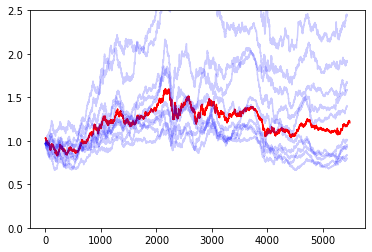

In [ ]:
# Random Walk method
plt.plot(data.Close.values,color='red')
plt.ylim((0,2.5))
N_start=50
df=data
for j in range (0,10):
  initial_stock=data['Close'].iloc[N_start]
  cours=np.array([initial_stock])
  df['T'+str(j)]=0
  print(j)
  for i in range(N_start,len(data)):
    # pick a random variation 
    perc=data['daily perc'][i-N_start:i].sample()
    cours=np.append(cours,cours[-1]*perc)
    df['T'+str(j)].iloc[i]=cours[-1]
  plt.plot(cours,color='blue',alpha=0.2)
plt.show() 


In [ ]:
# Calculate 95% percentile
df['lower']=0
df['median']=0
df['upper']=0
for j in range (0,len(df)):
  lower, median, upper=np.percentile(df.iloc[j][7:],[2.5,50,97.5])
  df['lower'].iloc[j]=lower
  df['median'].iloc[j]=median
  df['upper'].iloc[j]=upper

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



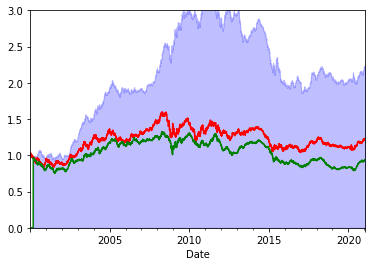

In [ ]:
df['Close'].plot(color='red')
plt.ylim((0,3))
df['median'].plot(color='green')
plt.fill_between(df.index,df['lower'],df['upper'],color='blue',alpha=0.25)
plt.show()

In [ ]:
# Extrapolate for n days using data from last N_start days
def extrapol(N_start=100,n=5):
  N_start=100
  n_traces=5000# how many traces we want
  df=data
  n=5 # amount of days to extrapolate
  X=pd.DataFrame()
  percent=df['daily perc'][-N_start:].values.tolist()
  for j in range(0,n_traces): # How many traces we generate
    cours=np.array([df.Close[-1]])
    for i in range(0,n):
      # pick a sample variation
      perc=np.random.choice(percent) #[i:])
      cours=np.append(cours,cours[-1]*perc)
      percent.append(perc)
    X['T'+str(j)]=cours 
    # Calculate 95% percentile
  X['lower']=0
  X['median']=0
  X['upper']=0
  for j in range (0,len(X)):
    lower, median, upper=np.percentile(X.iloc[j][0:],[5,50,97.5])
    X['lower'].iloc[j]=lower
    X['median'].iloc[j]=median
    X['upper'].iloc[j]=upper
  # Plot the extrapolation
  #plt.ylim((0,150))
  #X['median'].plot(color='green')
  #plt.ylim((df.Open[-1]*0.95,df.Open[-1]*1.05))
  #plt.fill_between(X.index,X['lower'],X['upper'],color='blue',alpha=0.25)
  #plt.show()
  prediction=X.iloc[-1][0:n_traces]
  med=np.percentile(prediction, 50)
  return med

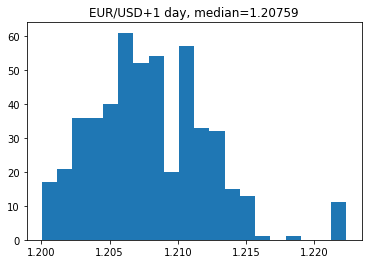

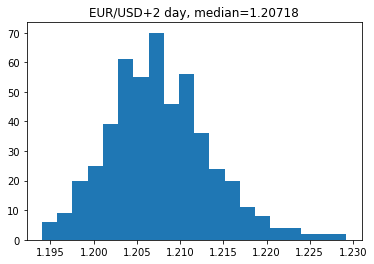

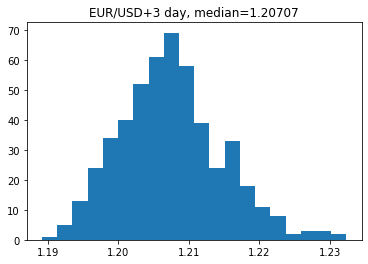

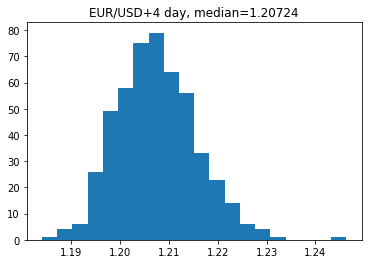

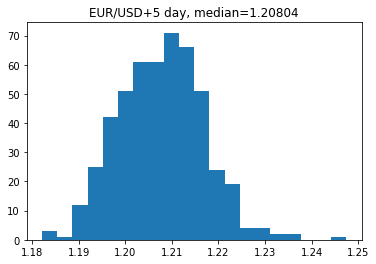

In [ ]:
for i in range(1,6+0*len(X)):
  prediction=X.iloc[i][0:n_traces]
  med=np.percentile(prediction, 50)
  plt.title(Index+'+'+str(i)+' day, median=%0.5f'%med)
  plt.hist(prediction,bins=20)
  plt.show()

# Neural Nets (LSTM, Conv1d,...)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#data=data[['Close','candle']]

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"][3:]
    val_loss = history.history["val_loss"][3:]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


In [ ]:
data

,Open,High,Low,Close,USDJPY,EURJPY
Date,,,,,,
2000-01-03,1.0052,1.0282,1.0050,1.0265,101.59,104.29
2000-01-04,1.0244,1.0347,1.0213,1.0312,103.27,106.48
2000-01-05,1.0295,1.0404,1.0282,1.0316,104.29,107.59
2000-01-06,1.0325,1.0419,1.0275,1.0324,105.33,108.66
2000-01-07,1.0327,1.0333,1.0252,1.0292,105.36,108.44
...,...,...,...,...,...,...
2021-02-01,1.2140,1.2146,1.2054,1.2059,104.91,126.51
2021-02-02,1.2059,1.2089,1.2011,1.2042,104.97,126.39
2021-02-03,1.2044,1.2050,1.2003,1.2034,105.01,126.36


In [ ]:
scalerX=MinMaxScaler()
scalery=MinMaxScaler()

scalerX.fit(data)
scalery.fit(data.Close.values.reshape(-1,1))


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
data_scaled=pd.DataFrame(scalerX.transform(data),columns=data.columns)
data_scaled.index=data.index

In [ ]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
past=30
horizon=4
train_split=int(len(data)*0.8)
batch_size=1
sequence_length=past

data_scaled['target']=data_scaled['Close'].shift(-horizon+1)
data_scaled.dropna(inplace=True)
X=data_scaled.drop(['target'],axis=1) # To make sure  there is no data leak and pred is just a shift of today's Close
y=data_scaled['target']



X_train=X[:train_split]
X_test=X[train_split+1:]
y_train=y[:train_split]
y_test=y[train_split+1:]

In [ ]:
X

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-07,0.000000,0.000000,0.000000,0.000000,0.000058,0.000000
2016-02-08,0.000123,0.000206,0.000255,0.000126,0.000102,0.000126
2016-02-09,0.000563,0.000384,0.000372,0.000630,0.000238,0.000630
2016-02-10,0.001028,0.000757,0.000854,0.000858,0.000414,0.000858
2016-02-11,0.001844,0.001094,0.001143,0.001777,0.000377,0.001777
...,...,...,...,...,...,...
2021-01-20,0.799956,0.753562,0.800293,0.803940,0.770302,0.803940
2021-01-21,0.786805,0.665605,0.804629,0.651988,0.756280,0.651988
2021-01-22,0.723504,0.634096,0.650835,0.718982,0.723114,0.718982


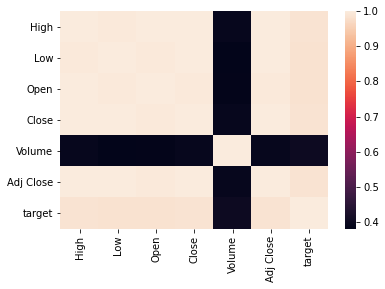

In [ ]:
import seaborn as sns
sns.heatmap(data_scaled.corr())


In [ ]:
train_dataset = TimeseriesGenerator(X_train, y_train, length=past, batch_size=64)
test_dataset = TimeseriesGenerator(X_test, y_test, length=past, batch_size=1)
inputs, targets = train_dataset[0]
print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)
#inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))

Input shape: (64, 30, 6)
Target shape: (64,)


In [ ]:
def FFWD_model():
    input_layer = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
    layer = keras.layers.Dense(50,activation='relu')(input_layer)
    #layer=keras.layers.Dropout(0.2)(layer)
    layer = keras.layers.Dense(50,activation='relu')(layer)
    layer = keras.layers.Dense(10,activation='relu')(layer)
    layer = keras.layers.Flatten()(layer)
    outputs = keras.layers.Dense(1,activation='relu')(layer)
    model = keras.Model(inputs=input_layer, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    model.summary()
    return model

In [ ]:
def LSTM_model():
    input_layer = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
    lstm_out = keras.layers.LSTM(32,return_sequences=True,activation='relu')(input_layer)
    lstm_out = keras.layers.LSTM(32,activation='relu',return_sequences=True)(lstm_out)
    lstm_out = keras.layers.LSTM(32,activation='relu',return_sequences=False)(lstm_out)
    #lstm_out=keras.layers.Dense(8,activation='relu')(lstm_out)
    outputs = keras.layers.Dense(1,activation='relu')(lstm_out)
    model = keras.Model(inputs=input_layer, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="mse")
    model.summary()
    return model

In [ ]:
def Conv1d_model():
   # Structure 
   # Input Layer
   # Kernel size 2 x 32 variations
   # Kernel Size 2 x 3
    input_layer = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
    conv1=keras.layers.Conv1D(filters=16, kernel_size=2)(input_layer) # Differentation of the signal
    conv2=keras.layers.Conv1D(filters=16, kernel_size=2)(conv1) # Again we differentiate
    pool=keras.layers.MaxPooling1D(pool_size=2)(conv2)
    conv3=keras.layers.Conv1D(filters=32, kernel_size=2)(pool) # 
    conv4=keras.layers.Conv1D(filters=32, kernel_size=2)(conv3) # High level features creation
    #pool2=keras.layers.AveragePooling1D(pool_size=3)(conv4)
    flat=keras.layers.Flatten()(conv4)
    dropout=keras.layers.Dropout(0.2)(flat)
 #   dense=keras.layers.Dense(50, activation='relu')(flat)
    outputs = keras.layers.Dense(1,activation='linear')(flat)
    model = keras.Model(inputs=input_layer, outputs=outputs)16
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    model.summary()
   #dropout=keras.layers.Dropout(0.02)(conv2)
    
   
    return model

In [ ]:
model=Conv1d_model()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 30, 6)]           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 29, 16)            208       
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 28, 16)            528       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 14, 16)            0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 13, 32)            1056      
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 12, 32)            2080      
_________________________________________________________________
flatten_6 (Flatten)          (None, 384)               0   

In [ ]:
model=FFWD_model()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 30, 6)]           0         
_________________________________________________________________
dense_20 (Dense)             (None, 30, 50)            350       
_________________________________________________________________
dense_21 (Dense)             (None, 30, 50)            2550      
_________________________________________________________________
dense_22 (Dense)             (None, 30, 10)            510       
_________________________________________________________________
flatten_9 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 301       
Total params: 3,711
Trainable params: 3,711
Non-trainable params: 0
________________________________________________________

In [ ]:
def hybrid_model():
    input_layer = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
    conv1=keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
    conv2=keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu')(conv1)
    pool=keras.layers.AveragePooling1D(pool_size=2)(conv2)
    #flat=keras.layers.Flatten()(pool)
    gru = keras.layers.GRU(10,return_sequences=False,activation='relu')(pool)
    #dense=keras.layers.Dense(50, activation='relu')(flat)
    flat=keras.layers.Flatten()(gru)
    outputs = keras.layers.Dense(1,activation='relu')(flat)
    model = keras.Model(inputs=input_layer, outputs=outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
    model.summary()
    return model

In [ ]:
model=LSTM_model()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 30, 6)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 32)            4992      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 32)            8320      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 21,665
Trainable params: 21,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_dataset,epochs=50,validation_data=test_dataset,batch_size=256)

Epoch 1/50
23/23 [==============================] - 2s 54ms/step - loss: 0.0040 - val_loss: 0.0048
Epoch 2/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3/50
23/23 [==============================] - 1s 35ms/step - loss: 0.0025 - val_loss: 0.0114
Epoch 4/50
23/23 [==============================] - 1s 33ms/step - loss: 0.0017 - val_loss: 0.0093
Epoch 5/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 6/50
23/23 [==============================] - 1s 34ms/step - loss: 7.5429e-04 - val_loss: 0.0049
Epoch 7/50
23/23 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 0.0060
Epoch 8/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 9/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0018 - val_loss: 0.0057
Epoch 10/50
23/23 [==============================] - 1s 34ms/step - loss: 7.5055e-04 - val_loss: 0.0040
E

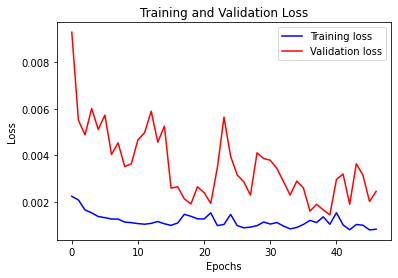

In [ ]:
visualize_loss(history, "Training and Validation Loss")

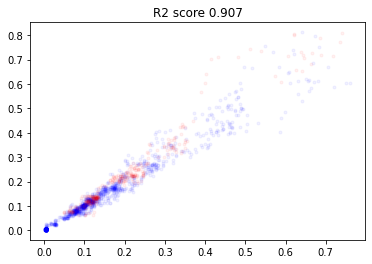

In [ ]:
pred_train=model.predict(train_dataset)
pred_test=model.predict(test_dataset)
plt.scatter(pred_train,y_train[past:].values,alpha=0.05,marker='.',color='blue')
plt.scatter(pred_test,y_test[past:].values,alpha=0.05,marker='.',color='red')
plt.title("R2 score %0.3f"%r2_score(y_test[past:],pred_test))
plt.show()

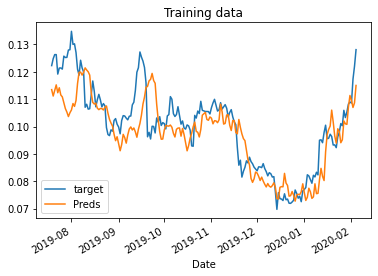

In [ ]:
results_train=pd.DataFrame(y_train[past:])
results_train['Preds']=pred_train
results_train.iloc[-200:].plot()
plt.title('Training data')
plt.show()

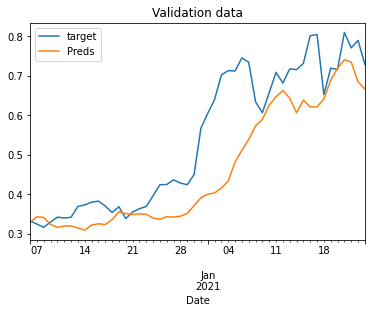

In [ ]:
results_test=pd.DataFrame(y_test[past:])
results_test['Preds']=pred_test
results_test.iloc[-50:].plot()
plt.title('Validation data')
plt.show()

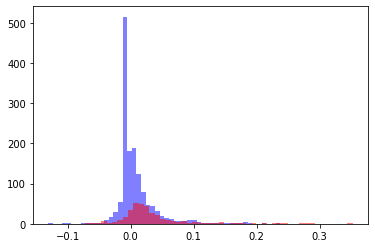

In [ ]:
error_train=y_train[past:].values.ravel()-pred_train.ravel()
error_test=y_test[past:].values.ravel()-pred_test.ravel()
plt.hist(error_train,bins=50,color='blue',alpha=0.5)

plt.hist(error_test,bins=50,color='red',alpha=0.5)
plt.show()

# Using Prophet

In [ ]:
data.head()

,Open,High,Low,Close,USDJPY,EURJPY,daily perc,candle
Date,,,,,,,,
2000-01-04,1.0244,1.0347,1.0213,1.0312,103.27,106.48,1.004579,0.507463
2000-01-05,1.0295,1.0404,1.0282,1.0316,104.29,107.59,1.000388,0.172131
2000-01-06,1.0325,1.0419,1.0275,1.0324,105.33,108.66,1.000775,-0.006944
2000-01-07,1.0327,1.0333,1.0252,1.0292,105.36,108.44,0.996900,-0.432099
2000-01-10,1.0288,1.0303,1.0213,1.0257,105.11,107.78,0.996599,-0.344444


In [ ]:
data['ds']=data.index
data['y']=data.Close
# Select only the important features i.e. the date and price
#data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
#data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,Open,High,Low,Close,USDJPY,EURJPY,daily perc,candle,ds,y
Date,,,,,,,,,,
2000-01-04,1.0244,1.0347,1.0213,1.0312,103.27,106.48,1.004579,0.507463,2000-01-04,1.0312
2000-01-05,1.0295,1.0404,1.0282,1.0316,104.29,107.59,1.000388,0.172131,2000-01-05,1.0316
2000-01-06,1.0325,1.0419,1.0275,1.0324,105.33,108.66,1.000775,-0.006944,2000-01-06,1.0324
2000-01-07,1.0327,1.0333,1.0252,1.0292,105.36,108.44,0.996900,-0.432099,2000-01-07,1.0292
2000-01-10,1.0288,1.0303,1.0213,1.0257,105.11,107.78,0.996599,-0.344444,2000-01-10,1.0257


In [ ]:
df=data[['ds','y','EURJPY']]
df=df.reset_index()

In [ ]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=20,daily_seasonality = True) # the Prophet class (model)
#m.add_regressor('EURJPY')
m.fit(df) # fit the model using all data

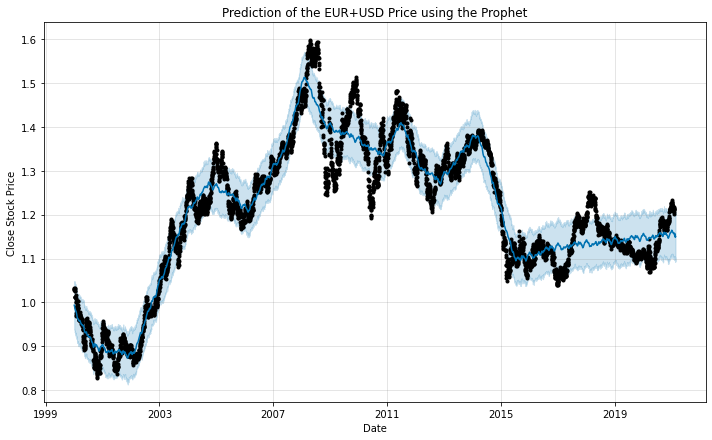

In [ ]:
future = m.make_future_dataframe(periods=15) #we need to specify the number of days in future
#future['EURJPY']=df['EURJPY']
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the EUR+USD Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, prediction)

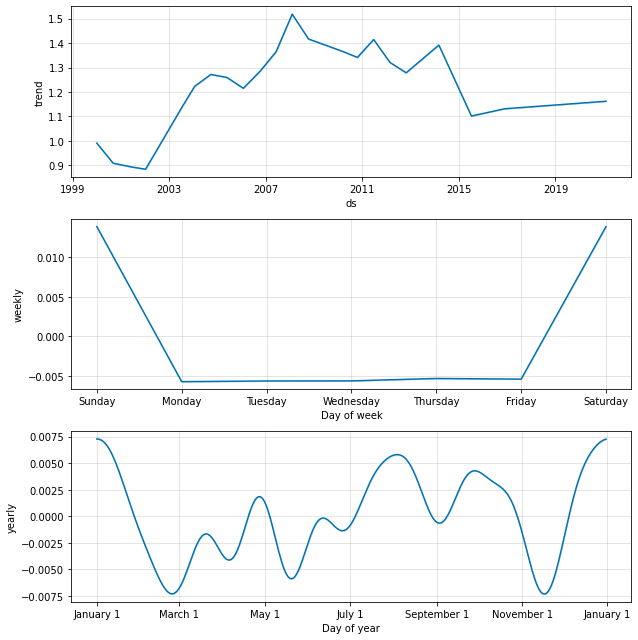

In [ ]:
m.plot_components(prediction)
plt.show()

# Cryptocurrencies

In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-5,end.month,end.day)
#using yahoo finance to grab cryptocurrency data

#BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
#LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

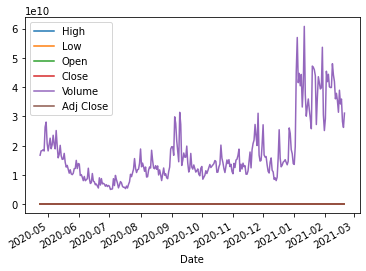

In [4]:
ETH[-300:].plot()

In [5]:
ETH.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-20,4.75406,4.12707,4.68220,4.34133,8631090.0,4.34133
2016-02-21,4.71151,4.22761,4.36055,4.65362,6413550.0,4.65362
2016-02-22,5.64571,4.63525,4.66495,5.61650,15056200.0,5.61650
2016-02-23,5.94764,5.38782,5.68493,5.58621,13380600.0,5.58621
2016-02-24,6.23647,5.50925,5.60405,6.23647,11426500.0,6.23647


In [6]:
plt.rcParams["figure.figsize"] = (10,10)
#ma_days = [10,20,50]
#for ma in ma_days:
# column_name = 'MA %s days' %(str(ma))
# ETH[column_name] = ETH['Adj Close'].rolling(window=ma,center=False).mean()
#ETH[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True)

In [7]:
data=ETH

In [8]:
ETH.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-20,4.75406,4.12707,4.68220,4.34133,8631090.0,4.34133
2016-02-21,4.71151,4.22761,4.36055,4.65362,6413550.0,4.65362
2016-02-22,5.64571,4.63525,4.66495,5.61650,15056200.0,5.61650
2016-02-23,5.94764,5.38782,5.68493,5.58621,13380600.0,5.58621
2016-02-24,6.23647,5.50925,5.60405,6.23647,11426500.0,6.23647


In [ ]:
len(data)

1824

In [ ]:
# Faire un clustering unsupervised en regardant le ration sur le MAX et le MIN à 5 jours par rapport au cours au temps t
future=5 # days in future
ETH['Max_F']=0
ETH['Min_F']=0
for j in range(0,len(ETH)-future):
  ETH['Max_F'].iloc[j]=max(ETH['High'].iloc[j:j+future])/ETH['Close'].iloc[j]
  ETH['Min_F'].iloc[j]=max(ETH['Low'].iloc[j:j+future])/ETH['Close'].iloc[j]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
ETH['Max_lbl']=0
ETH['Max_lbl'][(ETH['Max_F']>1.025) & (ETH['Max_F']<1.05)]=1
ETH['Max_lbl'][(ETH['Max_F']>=1.05) & (ETH['Max_F']<1.1)]=2
ETH['Max_lbl'][ETH['Max_F']>1.1]=3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
# Defina a simple label
# If value at t+future is 10% higher ==> label=1
ETH['10percup']=0
ETH['10percup'][ETH['Max_F']>=1.1]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


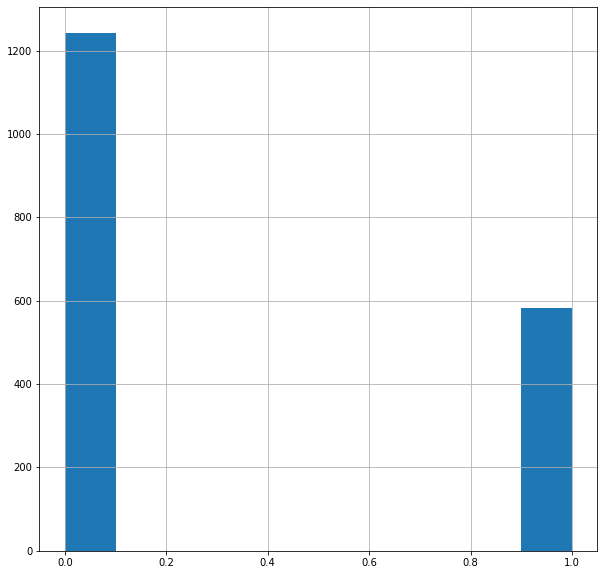

In [ ]:
ETH['10percup'].hist()

In [ ]:
ETH["Max_lbl"].value_counts()

3    582
2    477
0    410
1    355
Name: Max_lbl, dtype: int64

In [ ]:
ETH['Min_lbl']=0
ETH['Min_lbl'][(ETH['Min_F']>0.95) & (ETH['Min_F']<0.975)]=-1
ETH['Min_lbl'][(ETH['Min_F']>=0.9) & (ETH['Min_F']<0.95)]=-2
ETH['Min_lbl'][ETH['Min_F']<0.9]=-3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
data=ETH[['Close','High','Low','Open','Volume']]
Max_target=ETH['Max_lbl']
Min_target=ETH['Min_lbl']

In [ ]:
# Generate Dataset
lookback=5
X=[]
y=[]
for i in range(lookback,len(data)-future):
  data1=data['Open'].iloc[i-lookback:i].values
  data2=data['Close'].iloc[i-lookback:i].values
  data3=data['High'].iloc[i-lookback:i].values
  data4=data['Low'].iloc[i-lookback:i].values
  data5=data['Volume'].iloc[i-lookback:i].values
  X.append(np.array([data1,data2,data3,data4,data5]).ravel())
  y.append(ETH['10percup'].iloc[i])
y=np.array(y).reshape(-1,1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
from sklearn.metrics import roc_auc_score, make_scorer, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest 

In [ ]:
scorer=make_scorer(recall_score)

In [ ]:
pipe=Pipeline([
               ('feature_selection',SelectKBest()),
               ('classifier',lgb.LGBMClassifier())])

In [ ]:
params={'feature_selection__k':[10,15,20,25],
    'classifier__max_depth':[3,5,6,8,10]}

In [ ]:
grid=GridSearchCV(pipe, cv=5,param_grid=params,scoring=scorer)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(np.array(X),y.ravel(),shuffle=True,test_size=0.25)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feature_selection',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7f25e51406a8>)),
                                       ('classifier',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_weight=0.001,
                                  

In [ ]:
grid.best_params_

{'classifier__max_depth': 10, 'feature_selection__k': 25}

In [ ]:
grid.best_score_

0.3511494252873563

In [ ]:
model=grid.best_estimator_

In [ ]:
#model=xgb.XGBClassifier(max_depth=5,n_estimators=100)
model=lgb.LGBMClassifier()
model= SVC(kernel="linear", C=0.025)

In [ ]:
model.fit(X_train,y_train)

In [ ]:

print('Training score %0.2f'%model.score(X_train,y_train))
print('Validation score %0.2f'%model.score(X_test,y_test))

In [ ]:
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       313
           1       0.50      0.36      0.42       141

    accuracy                           0.69       454
   macro avg       0.62      0.60      0.60       454
weighted avg       0.67      0.69      0.67       454



In [ ]:
len(y_train)

1362

In [ ]:
print(confusion_matrix(y_train,model.predict(X_train)))

[[496   0   1   3]
 [ 10 337   1   3]
 [  8   1 317   2]
 [  2   0   1 180]]


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[103  38  29   7]
 [ 64  28  34   9]
 [ 35  19  26  10]
 [ 17   9  12  15]]


In [ ]:
prediction=model.predict_proba(X[-10].reshape(1,-1)).ravel()

In [ ]:
variation=['< de 2.5%','+2.5% -> +5%','5% -> 10%', '> de 10%']
print('Evolution du Max dans les ',future,' prochains jours')
for i,j in zip(variation, prediction):
  print(i,'\t \t %0.2f'%j, '%')

Evolution du Max dans les  2  prochains jours
< de 2.5% 	 	 0.39 %
+2.5% -> +5% 	 	 0.20 %
5% -> 10% 	 	 0.10 %
> de 10% 	 	 0.32 %


In [ ]:
ETH[-5:]

,High,Low,Open,Close,Volume,Adj Close,Max_F,Min_F,Max_lbl,Min_lbl
Date,,,,,,,,,,
2021-02-02,1542.990967,1362.771240,1369.505127,1515.193726,4.543714e+10,1515.193726,1.096170,0.996579,2,0
2021-02-03,1660.909546,1510.010254,1514.769653,1660.909546,4.187457e+10,1660.909546,1.017025,0.940360,0,-2
2021-02-04,1689.186646,1561.853516,1661.170166,1594.762695,4.439687e+10,1594.762695,1.101425,1.000019,3,0
2021-02-05,1756.510986,1594.793335,1594.793335,1718.650879,4.010863e+10,1718.650879,0.000000,0.000000,0,-3
2021-02-06,1737.736938,1650.164795,1680.496460,1687.108887,4.777680e+10,1687.108887,0.000000,0.000000,0,-3


In [ ]:
# Scale the data
scaler=MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
df=scaler.transform(data)
df=pd.DataFrame(df,columns=data.columns+'_S')
df.index=ETH.index
df=df.dropna(axis=1)

In [ ]:
df['Min_F']=ETH['Min_F']
df['Max_F']=ETH['Max_F']

In [ ]:
# Cluster the data
df

,High_S,Low_S,Open_S,Close_S,Volume_S,Adj Close_S,Min_F,Max_F
Date,,,,,,,,
2016-02-05,0.000026,0.000000e+00,0.000022,0.000003,0.000012,0.000003,1.248036,1.593011
2016-02-06,0.000000,6.831140e-07,0.000000,0.000000,0.000000,0.000000,1.492665,1.918136
2016-02-07,0.000284,4.103153e-05,0.000002,0.000254,0.000084,0.000254,1.463496,2.122641
2016-02-08,0.000408,2.535168e-04,0.000264,0.000382,0.000129,0.000382,1.594684,2.070184
2016-02-09,0.000848,4.374128e-04,0.000385,0.000893,0.000264,0.000893,1.253699,1.627524
...,...,...,...,...,...,...,...,...
2021-02-01,0.784110,7.972424e-01,0.787716,0.807959,0.480947,0.807959,0.000000,0.000000
2021-02-02,0.880828,8.526616e-01,0.820520,0.894374,0.748130,0.894374,0.000000,0.000000
2021-02-03,0.948255,9.449537e-01,0.907714,0.980530,0.689469,0.980530,0.000000,0.000000


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df.drop(['Min_F','Max_F'],axis=1))

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
from sklearn import manifold
from sklearn.decomposition import PCA

In [ ]:
tsne = manifold.TSNE(n_components=3, init='random',perplexity=10
                         ,random_state=123)
Y = tsne.fit_transform(df.drop(['Min_F','Max_F'],axis=1))

In [ ]:

#pca=PCA(n_components=3)
#Y = pca.fit_transform(df.drop(['Min_F','Max_F'],axis=1))

In [ ]:
Y=pd.DataFrame(Y,columns=['x1','x2','x3'])
Y.index=df.index
Y['label']=1.*(df['Min_F']<0.98)
#Y['label']=kmeans.labels_

In [ ]:
fig=px.scatter_3d(Y,x='x1',y='x2',z='x3',color='label')
fig.update_traces(marker=dict(size=4,
                         line=dict(width=1,
                         color='Black')),
              selector=dict(mode='markers'))
fig.show()

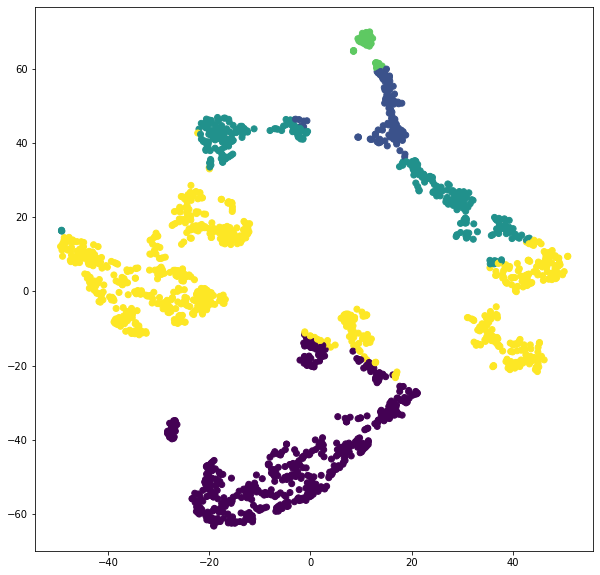

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=kmeans.labels_)

In [ ]:
# R Value calculation     

In [10]:
ETH.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-20,4.75406,4.12707,4.68220,4.34133,8631090.0,4.34133
2016-02-21,4.71151,4.22761,4.36055,4.65362,6413550.0,4.65362
2016-02-22,5.64571,4.63525,4.66495,5.61650,15056200.0,5.61650
2016-02-23,5.94764,5.38782,5.68493,5.58621,13380600.0,5.58621
2016-02-24,6.23647,5.50925,5.60405,6.23647,11426500.0,6.23647


In [16]:
ETH['PercentVar']=ETH['Close']/ETH['Close'].shift(1)

In [18]:
ETH['R']=ETH['PercentVar']/(ETH['PercentVar'].shift(1)*(1-ETH['PercentVar'].shift(1)))

In [21]:
ETH['R'].describe()

count     1822.000000
mean       -60.099139
std       2087.688365
min     -61812.133830
25%        -37.149230
50%         -4.657579
75%         45.215684
max      37359.489562
Name: R, dtype: float64